# Answering the Science Question

This notebook serves as a demo for answering the science question underlying the design of my Calfornia Ocean Temperature model. Y

For reference, the science question for my model is: **How does ocean temperature affect the sea level along the coast of California?**

First, import packages to re-create and visualize the model fields here:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

Next, define the location of the project directory for the model:

In [2]:
# define the input directory
project_dir = 'C:\\Users\\steph\\SJSU\\CS185C\\Project'

Then, re-create the model grid

In [3]:
delX = 1/12
delY = 1/16
xgOrigin = -137
ygOrigin = 29
n_rows = 360
n_cols = 240

# recreate the grids that will be used in the model
xc = np.arange(xgOrigin+delX/2, xgOrigin+n_cols*delX, delX)
yc = np.arange(ygOrigin+delY/2, ygOrigin+n_rows*delY, delY)
XC, YC = np.meshgrid(xc, yc)

## Plot a model field at one timestep
To assess the temperature differences spatially, I'll plot the differences between the model results with and without wind. I'll choose one field near the end of my simulation:

In [10]:
# read in the grid with the wind
grid_wind = np.fromfile(os.path.join(project_dir,'run','diags',
                                     'TS_surf_daily_mean',
                                     'TS_surf_daily_mean.0000035424.data'), '>f4')
grid_wind = grid_wind.reshape((2,n_rows,n_cols))

# read in the grid without the wind
grid_no_wind = np.fromfile(os.path.join(project_dir,'run_no_wind','diags',
                                     'TS_surf_daily_mean',
                                     'TS_surf_daily_mean.0000000864.data'), '>f4')
grid_no_wind = grid_no_wind.reshape((2,n_rows,n_cols))

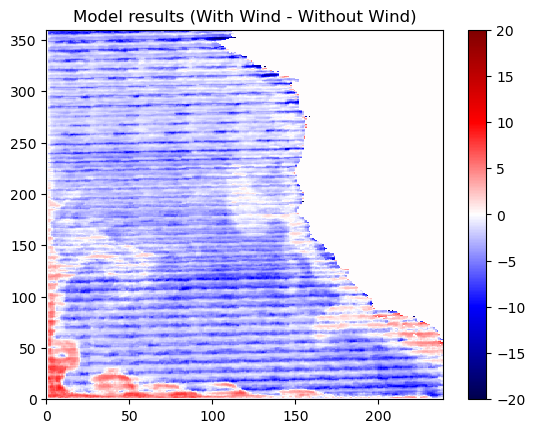

In [11]:
# plot the differences
C = plt.pcolormesh(grid_wind[0,:,:-1]-grid_no_wind[0,:,:-1],
                   cmap='seismic',vmin=-20, vmax=20)
plt.colorbar(C)
plt.title('Model results (With Wind - Without Wind)')
plt.show()

The map is almost entirely blue, showing that adding wind forcing cools the coastal surface by on the order of 5–15 °C. Only a few small red patches (~ 1–3 °C warming) appear right along the shoreline from wind-driven mixing, but the dominant effect is a large surface cooling due to upwelling.

## Make a timeseries
Next we can see how the differences between the models is evolving through time. For this example, I'll choose a point in the domain near the coast as in my previous notebook:

In [6]:
row = 125
col = 150

Next, I'll define a quick function to convert my iteration numbers to date and time information.

In [7]:
def iter_number_to_date(iter_number,seconds_per_iter=300):
    total_seconds = iter_number*seconds_per_iter
    date = datetime(2015,1,16) + timedelta(seconds=total_seconds)
    return(date)

Then, I'll loop through all of the output files to generate a timeseries:

In [8]:
timestep_dates = []
theta_wind_values = []
theta_no_wind_values = []
for file_name in sorted(os.listdir(os.path.join(project_dir,'run_no_wind','diags','TS_surf_daily_mean'))):
    if file_name[-4:]=='data':
        # get the timestep number
        timestep_number = int(file_name.split('.')[-2])
        timestep_dates.append(iter_number_to_date(timestep_number))

        # read in the grid with the wind
        grid_wind = np.fromfile(os.path.join(project_dir,'run','diags',
                                             'TS_surf_daily_mean',
                                             file_name), '>f4')
        grid_wind = grid_wind.reshape((2,n_rows,n_cols))
        
        # read in the grid without the wind
        grid_no_wind = np.fromfile(os.path.join(project_dir,'run_no_wind','diags',
                                             'TS_surf_daily_mean',
                                             file_name), '>f4')
        grid_no_wind = grid_no_wind.reshape((2,n_rows,n_cols))

        theta_wind_values.append(grid_wind[0,row,col])
        theta_no_wind_values.append(grid_no_wind[0,row,col])

Finally, I'll plot the timeseries to see the comparison:

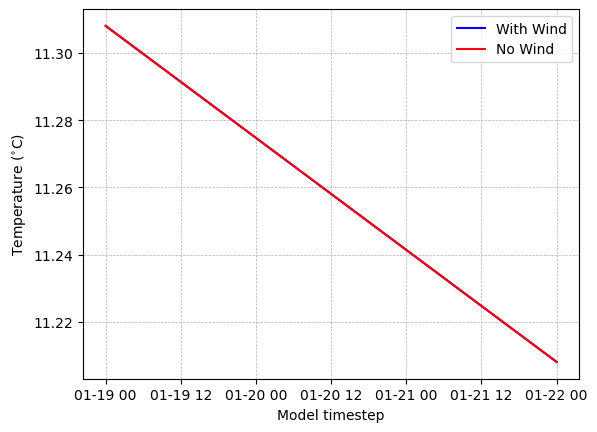

In [12]:
plt.plot(timestep_dates, theta_wind_values,'b-',label='With Wind')
plt.plot(timestep_dates, theta_no_wind_values,'r-',label='No Wind')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Model timestep')
plt.legend()
plt.grid(linestyle='--',linewidth=0.5)
plt.show()